# **Bayesian Networks**

In [1]:
import pandas as pd
import bnlearn as bn
from IPython.display import clear_output
from utils.visualization import (
    get_df_with_text, 
    get_wordcloud, 
    plot_wordcloud, 
    save_wordcloud
)
from utils.model import (
    create_pydantic_model, 
    predict, 
    save_model,
    predict_df, 
    get_accuracy, 
    get_summary
)

## **Load Data**

In [2]:
df = pd.read_csv('data/disease_symptoms.csv')
display(df.head())
print(df.shape)

Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                   NaN       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN       NaN       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symptom_14 Symptom_15  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   

  Symptom_16 Symptom_17  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

(4920, 18)


In [3]:
X_COL = 'symptoms'
Y_COL = 'Disease'

In [4]:
def get_symptoms(row) -> set:
    '''
    Gets all the symptoms for a disease instance
    '''
    # Every column excluding the disease name is a symptom
    symptoms = row.loc[row.index != Y_COL]

    return set(
        x.replace(' ', '') # Remove spaces
        for x in symptoms 
        if isinstance(x, str) # Assert it not NaN
    )

# For each row, get a set of symptoms
df_symptoms = df.copy()
df_symptoms[X_COL] = df_symptoms.apply(get_symptoms, axis=1)
df_symptoms = df_symptoms[[Y_COL, X_COL]]

# Get a new column for each symptom of the disease instance
# This yields a df with many rows per disease instance
df_exploded = df_symptoms.explode(X_COL)

# Apply one-hot encoding
df_encoded_ungrouped = pd.get_dummies(df_exploded[X_COL])

# Group by disease instance so the one-hot encoding is in a single row
df_encoded = df_encoded_ungrouped.groupby(df_exploded.index).sum()
df_encoded = pd.concat([df[Y_COL], df_encoded], axis=1)

# Obtain all the mentioned symptoms
SYMPTOMS = df_encoded.columns[1:]
display(df_symptoms.head())
display(df_encoded.head())

Disease                                           symptoms
0  Fungal infection  {skin_rash, nodal_skin_eruptions, itching, dis...
1  Fungal infection  {skin_rash, nodal_skin_eruptions, dischromic_p...
2  Fungal infection  {nodal_skin_eruptions, itching, dischromic_pat...
3  Fungal infection           {skin_rash, itching, dischromic_patches}
4  Fungal infection         {skin_rash, nodal_skin_eruptions, itching}

Disease  abdominal_pain  abnormal_menstruation  acidity  \
0  Fungal infection               0                      0        0   
1  Fungal infection               0                      0        0   
2  Fungal infection               0                      0        0   
3  Fungal infection               0                      0        0   
4  Fungal infection               0                      0        0   

   acute_liver_failure  altered_sensorium  anxiety  back_pain  belly_pain  \
0                    0                  0        0          0           0   
1                    0                  0        0          0           0   
2                    0                  0        0          0           0   
3                    0                  0        0          0           0   
4                    0                  0        0          0           0   

   blackheads  ...  vomiting  watering_from_eyes  weakness_in_limbs  \
0           0  ...         0                   0                  0   
1           0  ...         0                   0                  0   
2           0  ...         0                   0                  0   
3           0  ...         0                   0                  0   
4           0  ...         0                   0                  0   

   weakness_of_one_body_side  weight_gain  weight_loss  yellow_crust_ooze  \
0                          0            0            0                  0   
1                          0            0            0                  0   
2                          0            0            0                  0   
3                          0            0            0                  0   
4                          0            0            0                  0   

   yellow_urine  yellowing_of_eyes  yellowish_skin  
0             0                  0               0  
1             0                  0               0  
2             0                  0               0  
3             0                  0               0  
4             0                  0               0  

[5 rows x 132 columns]

## **Visualization**


 ============================== (vertigo) Paroymsal  Positional Vertigo ==============================



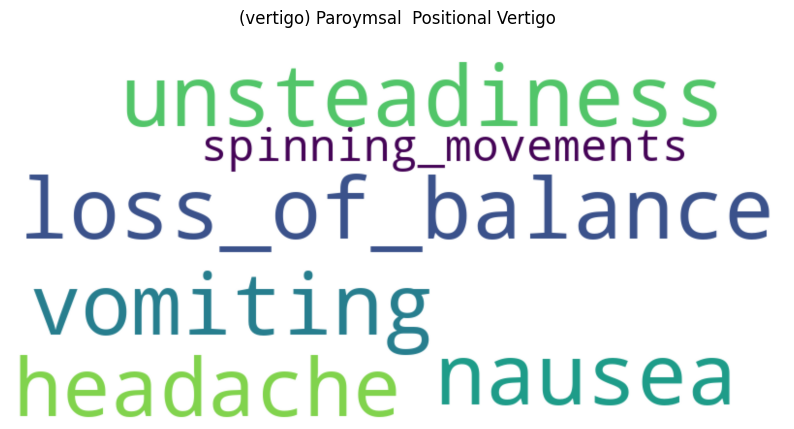


 ============================== AIDS ==============================



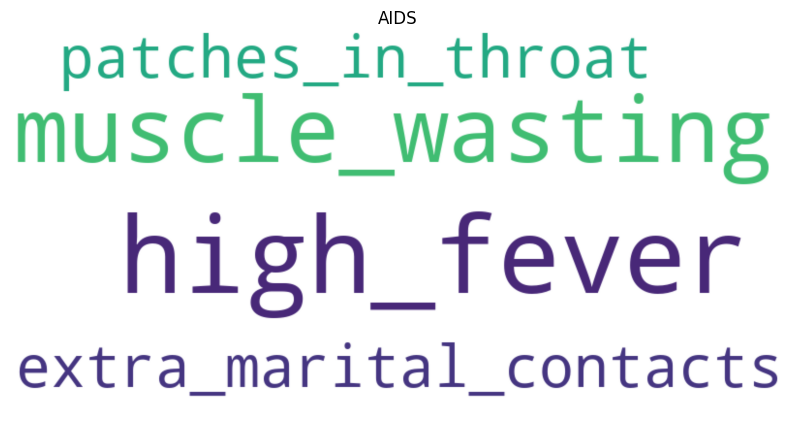


 ============================== Acne ==============================



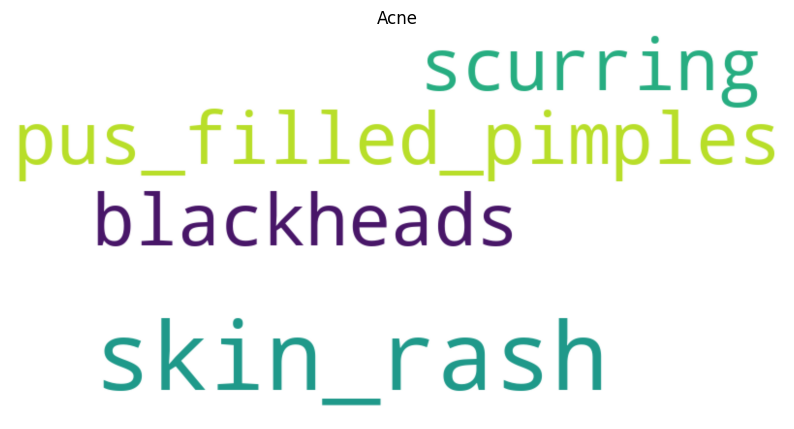


 ============================== Alcoholic hepatitis ==============================



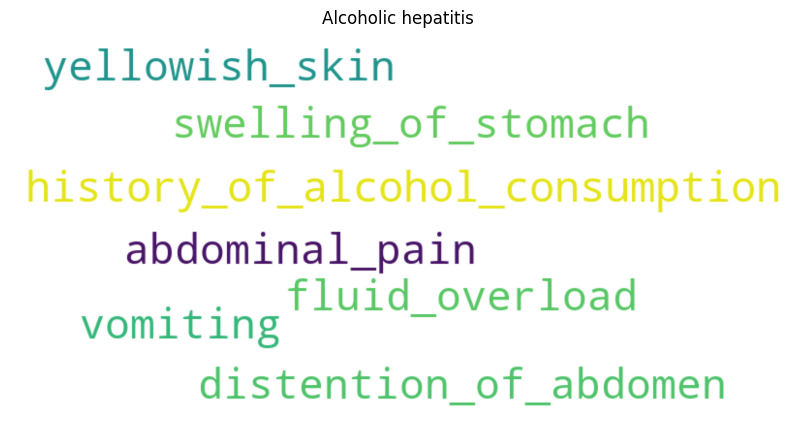


 ============================== Allergy ==============================



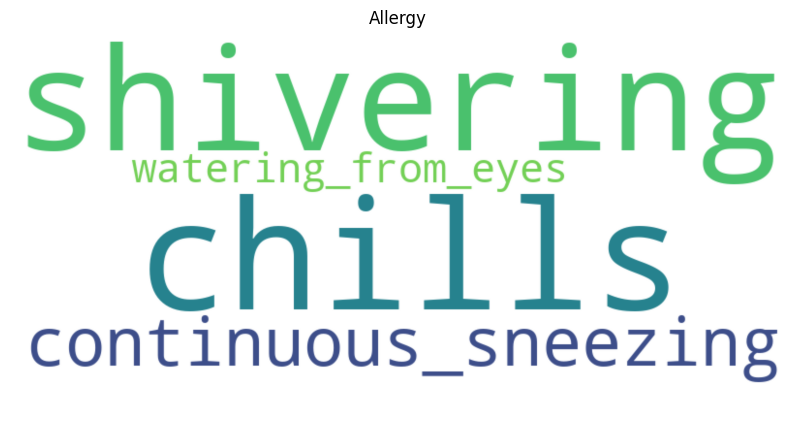


 ============================== Arthritis ==============================



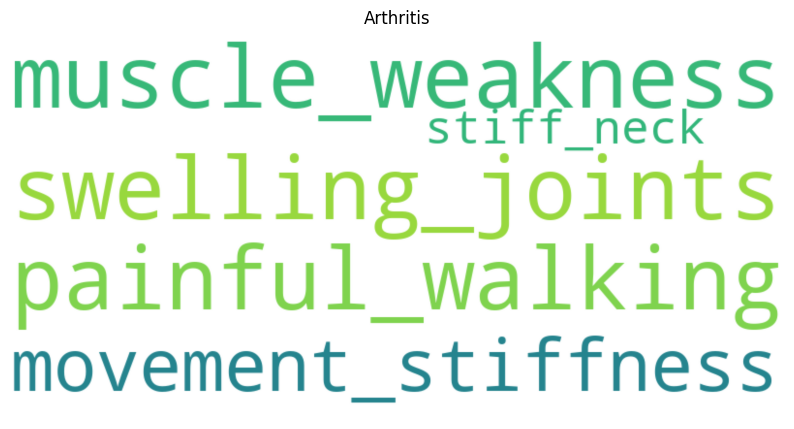


 ============================== Bronchial Asthma ==============================



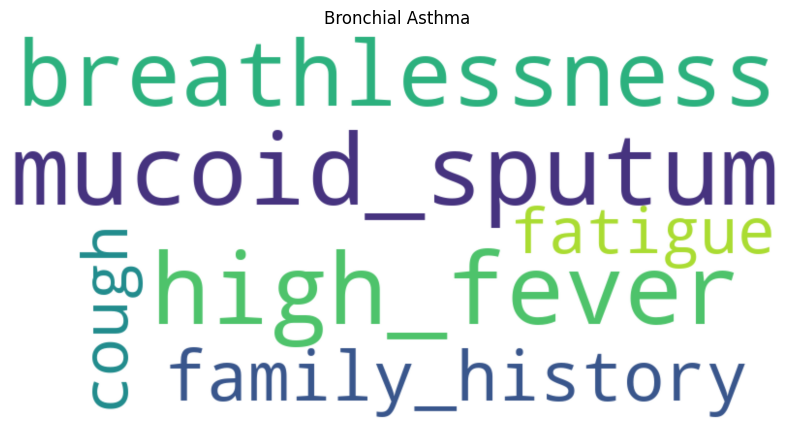


 ============================== Cervical spondylosis ==============================



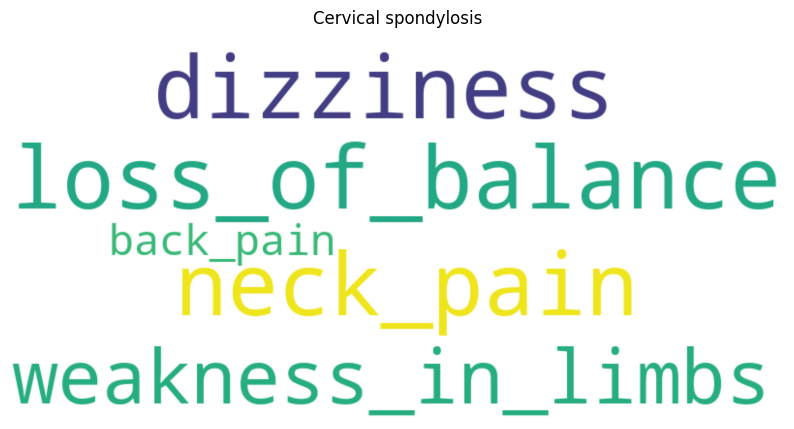


 ============================== Chicken pox ==============================



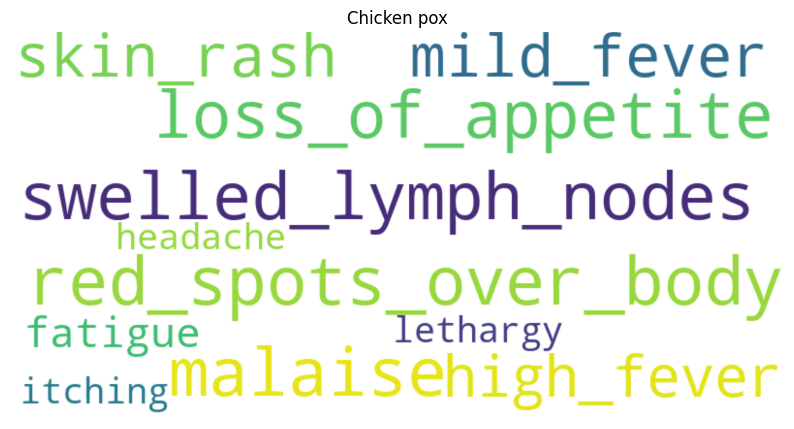


 ============================== Chronic cholestasis ==============================



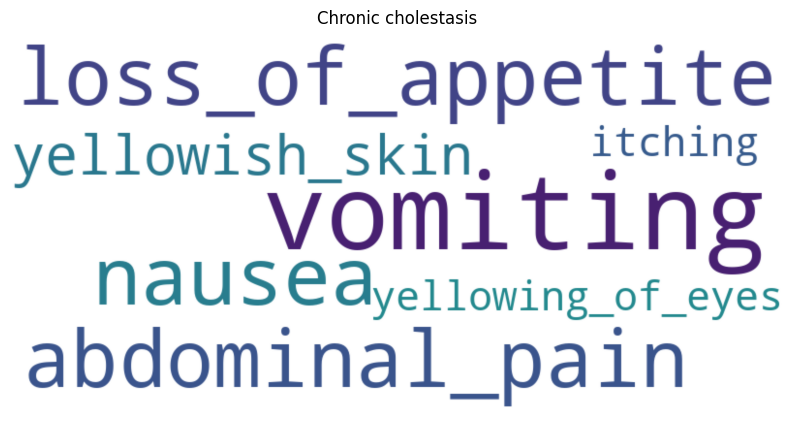


 ============================== Common Cold ==============================



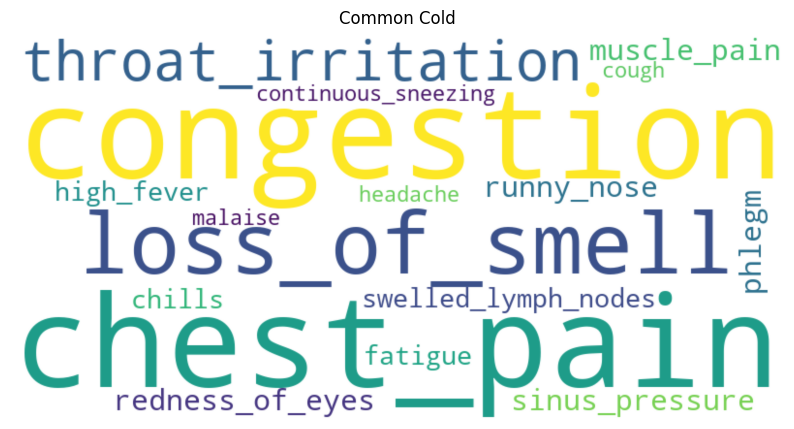


 ============================== Dengue ==============================



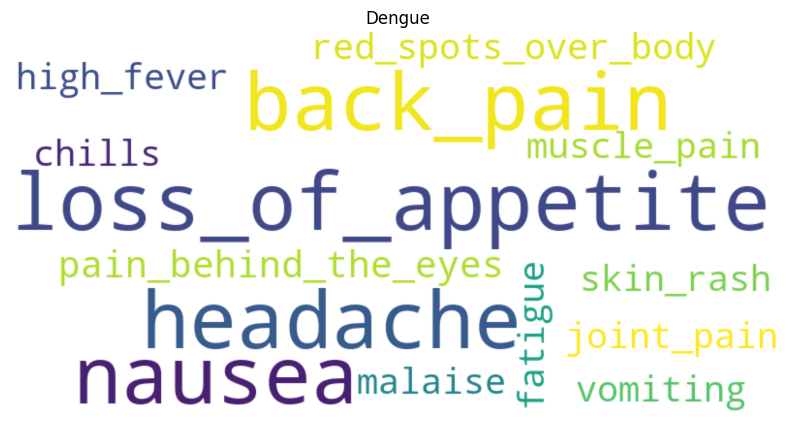


 ============================== Diabetes  ==============================



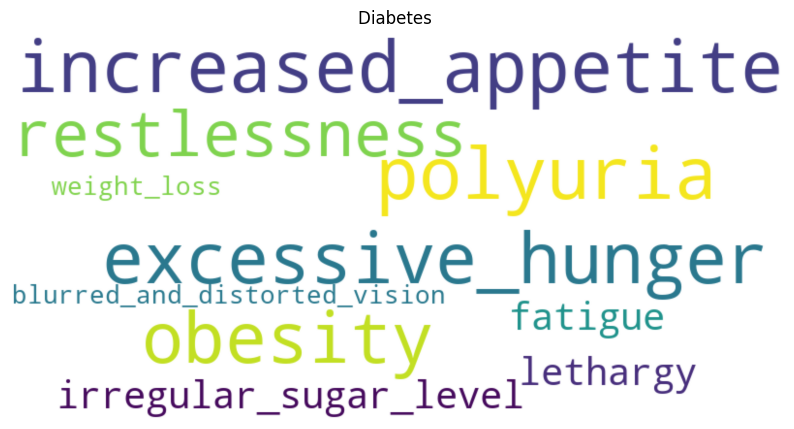


 ============================== Dimorphic hemmorhoids(piles) ==============================



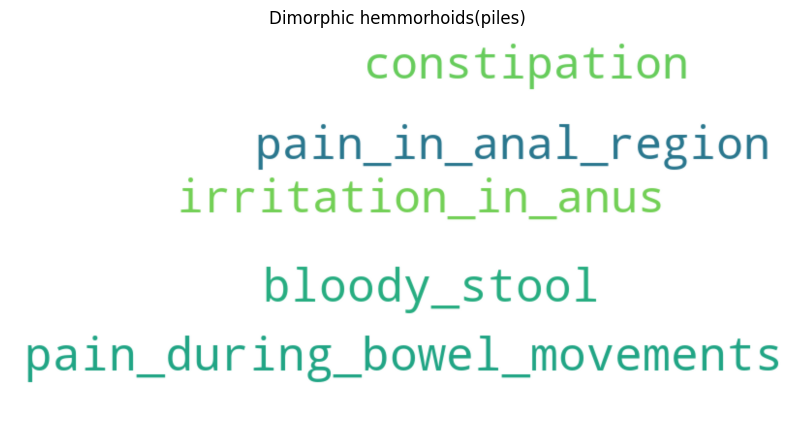


 ============================== Drug Reaction ==============================



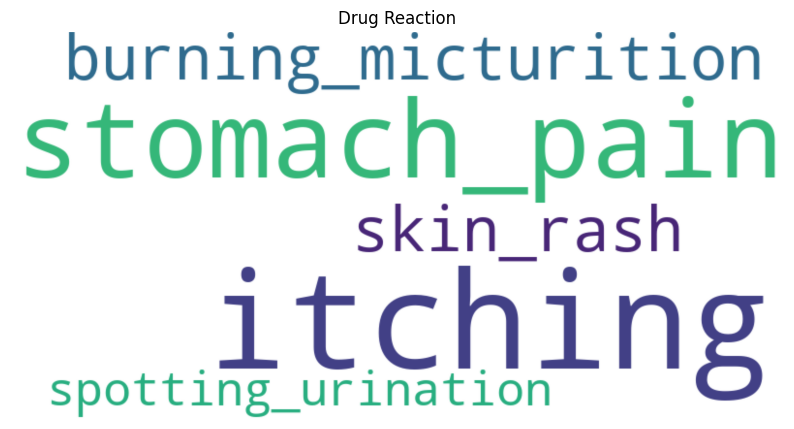


 ============================== Fungal infection ==============================



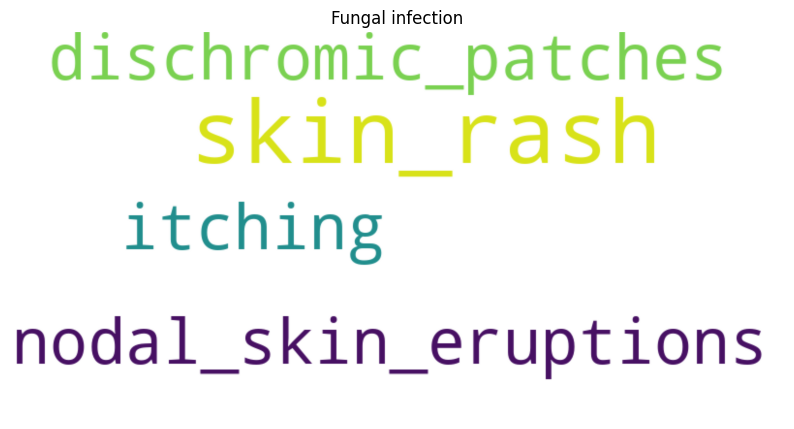


 ============================== GERD ==============================



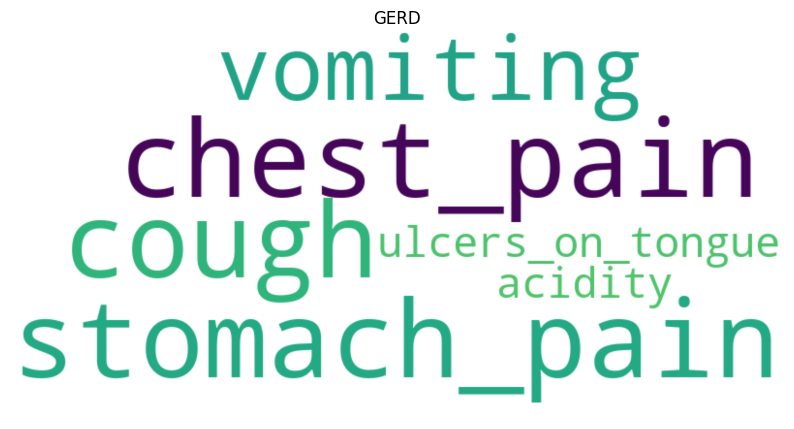


 ============================== Gastroenteritis ==============================



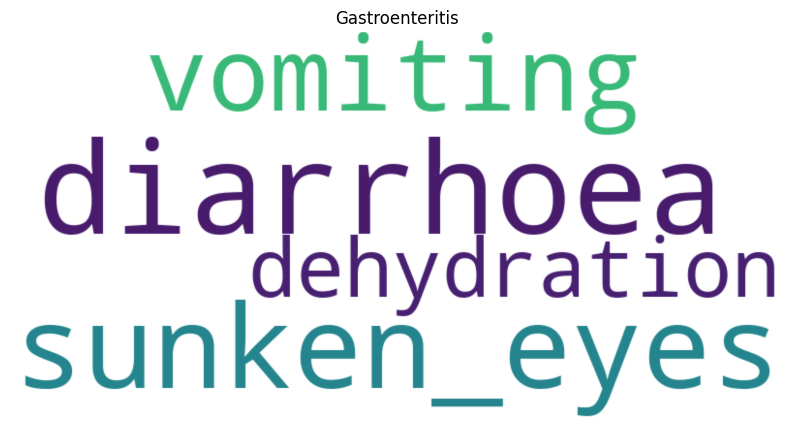


 ============================== Heart attack ==============================



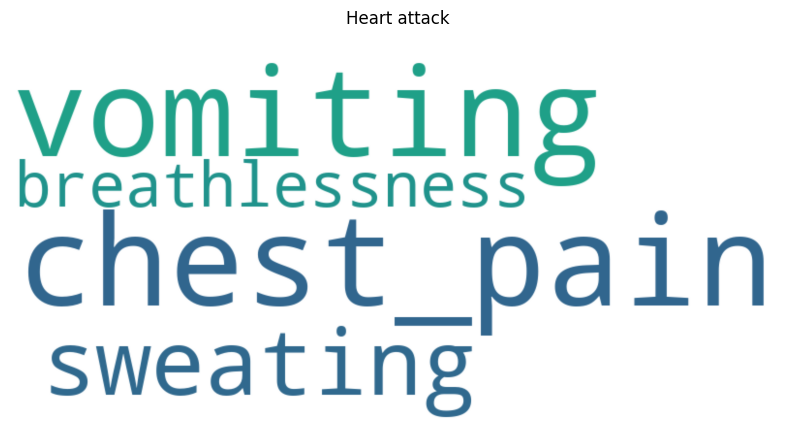


 ============================== Hepatitis B ==============================



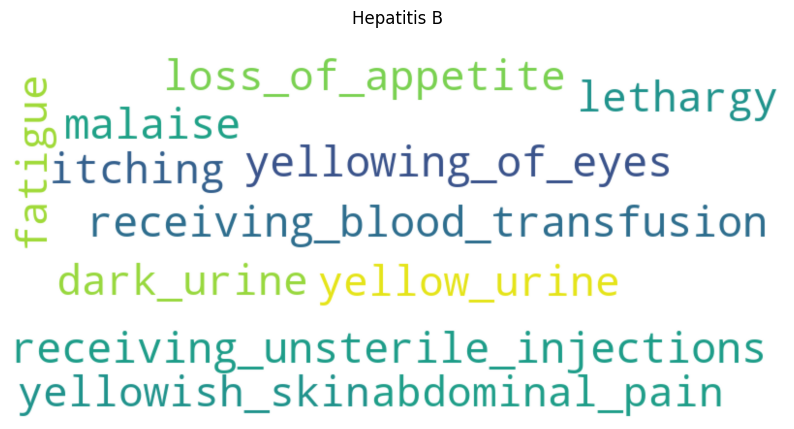


 ============================== Hepatitis C ==============================



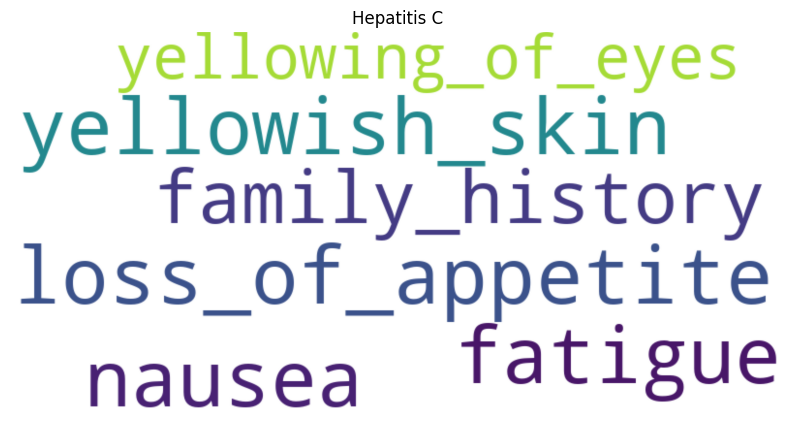


 ============================== Hepatitis D ==============================



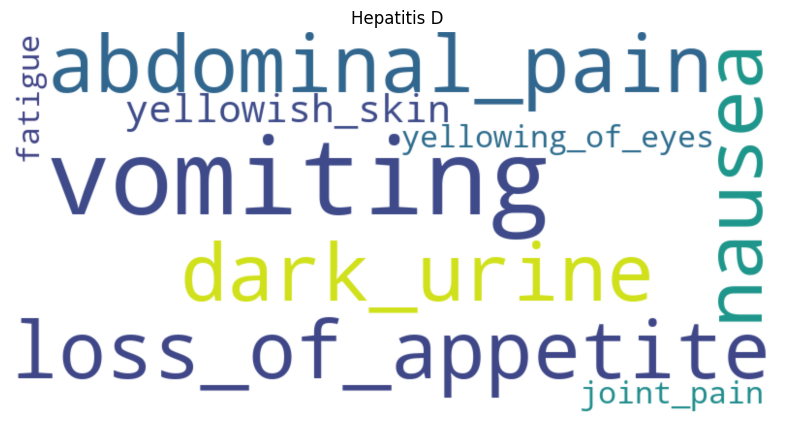


 ============================== Hepatitis E ==============================



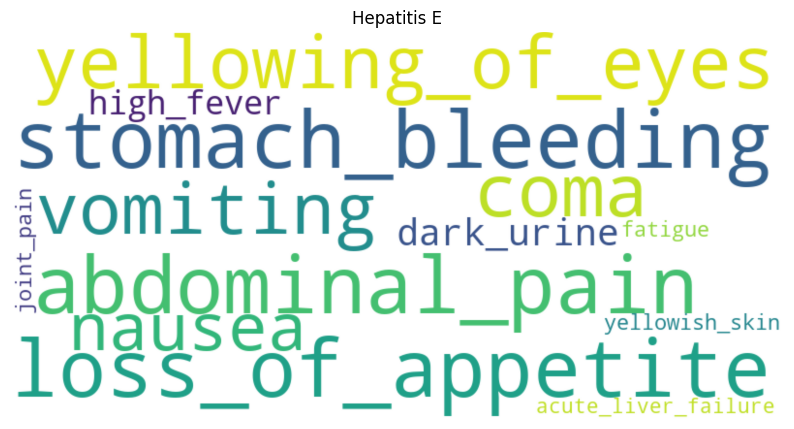


 ============================== Hypertension  ==============================



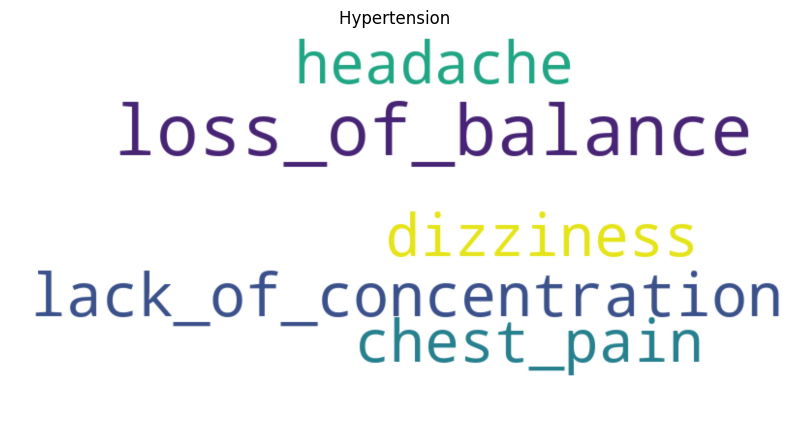


 ============================== Hyperthyroidism ==============================



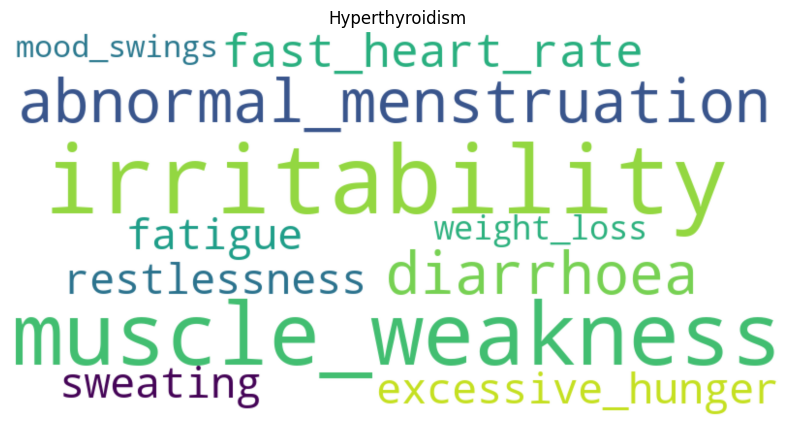


 ============================== Hypoglycemia ==============================



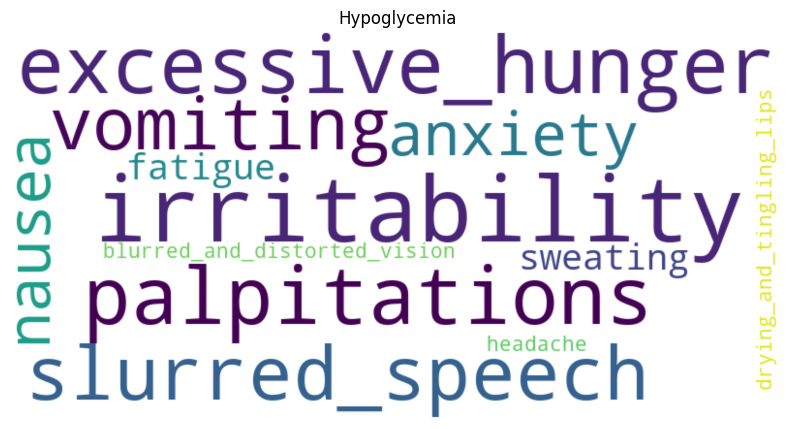


 ============================== Hypothyroidism ==============================



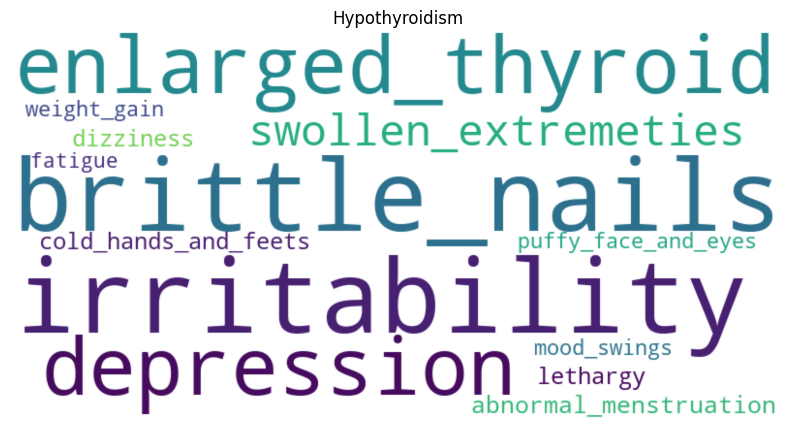


 ============================== Impetigo ==============================



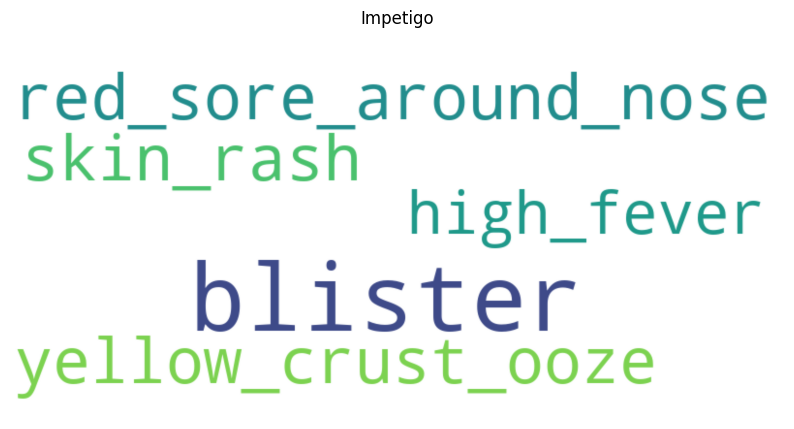


 ============================== Jaundice ==============================



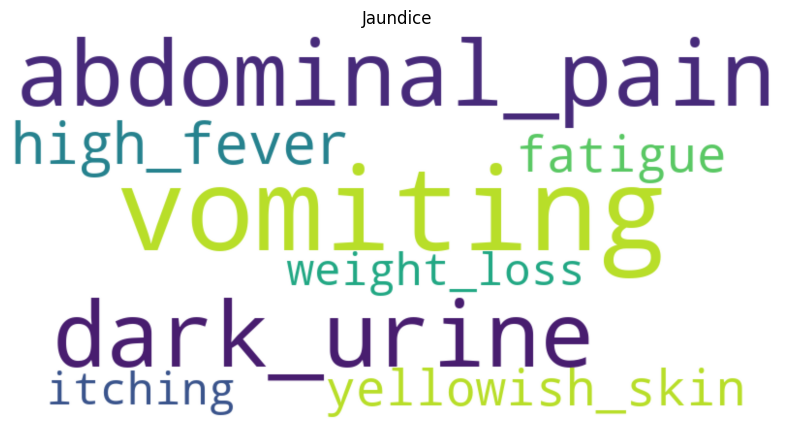


 ============================== Malaria ==============================



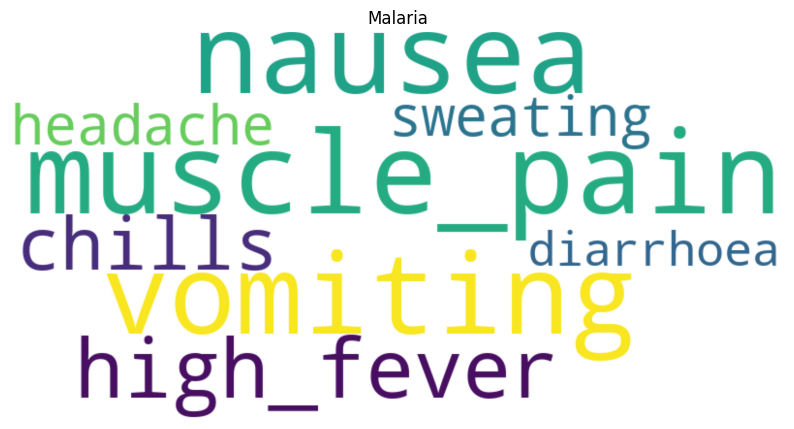


 ============================== Migraine ==============================



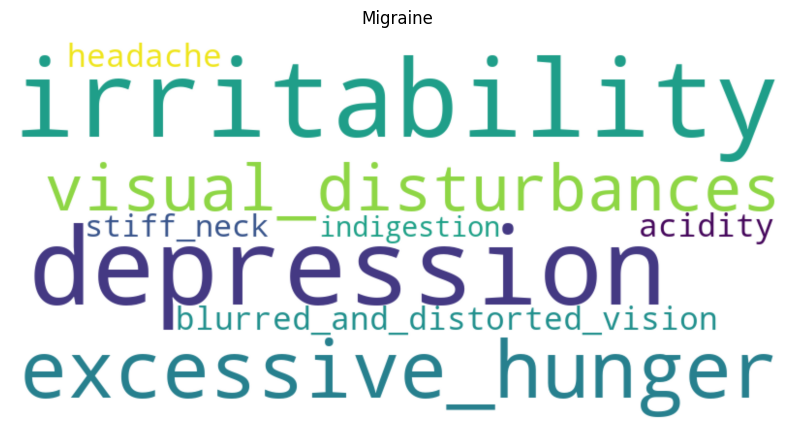


 ============================== Osteoarthristis ==============================



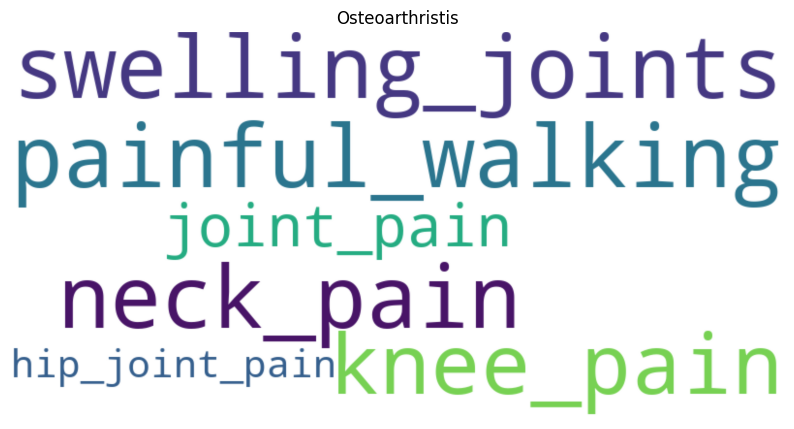


 ============================== Paralysis (brain hemorrhage) ==============================



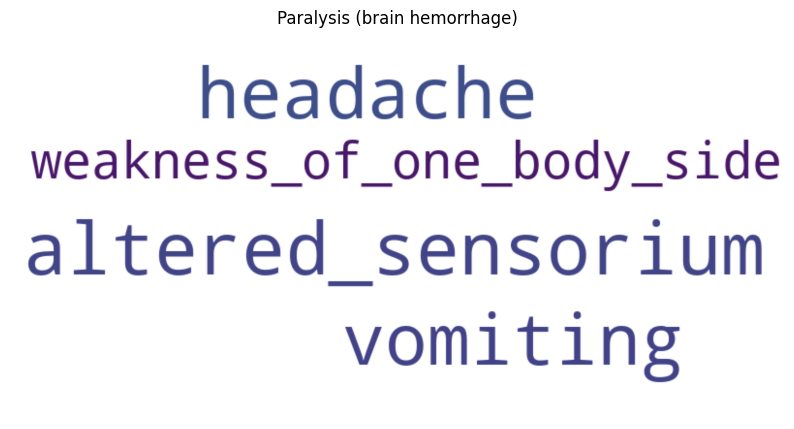


 ============================== Peptic ulcer diseae ==============================



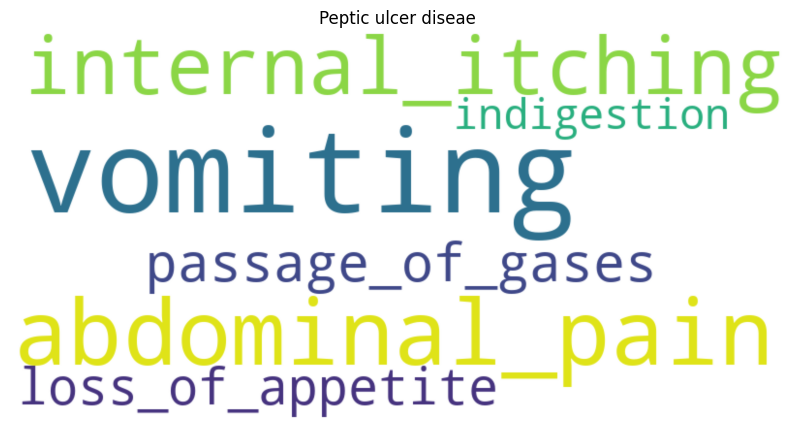


 ============================== Pneumonia ==============================



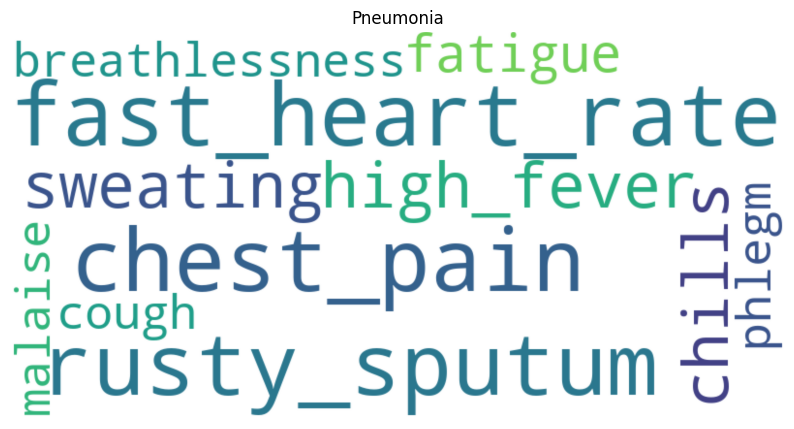


 ============================== Psoriasis ==============================



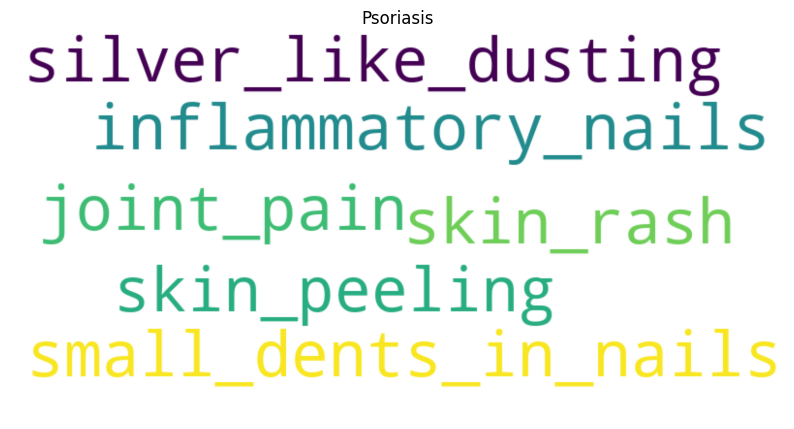


 ============================== Tuberculosis ==============================



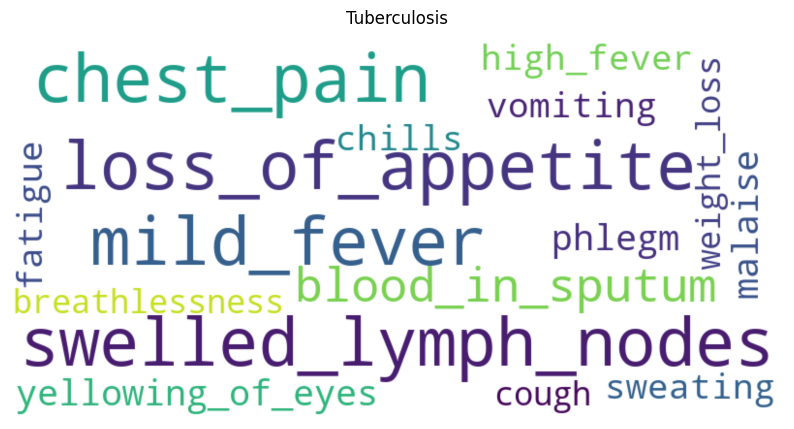


 ============================== Typhoid ==============================



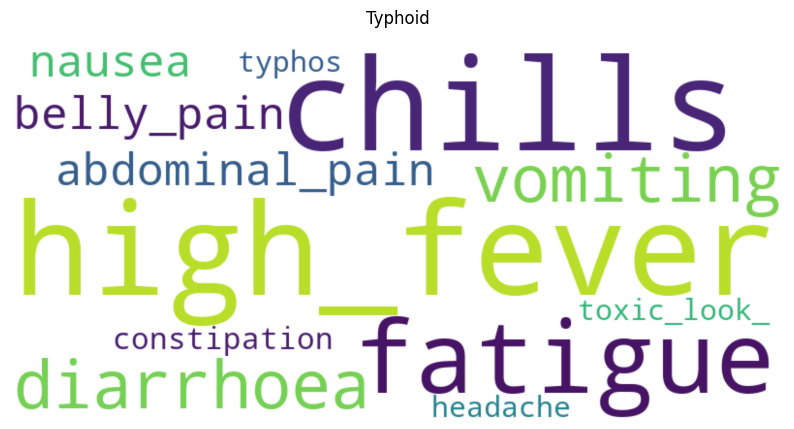


 ============================== Urinary tract infection ==============================



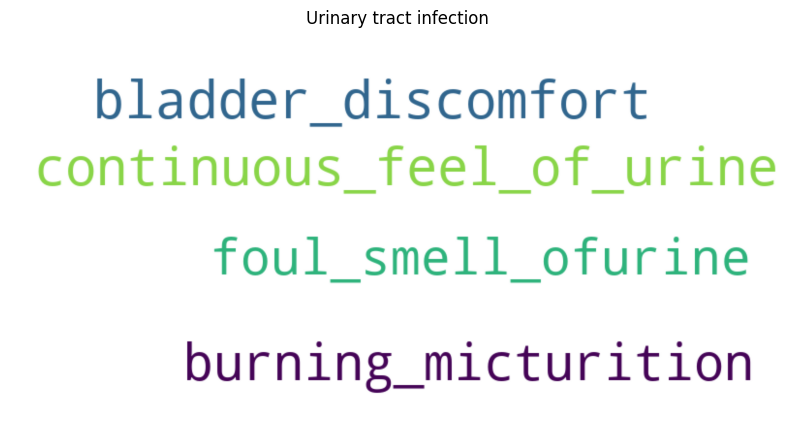


 ============================== Varicose veins ==============================



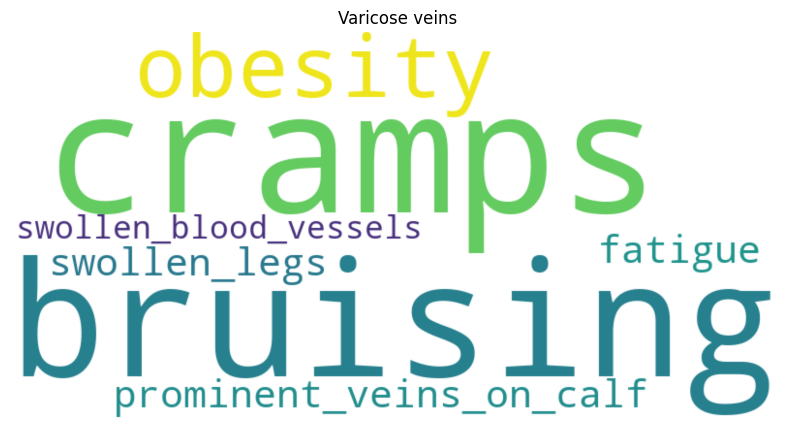


 ============================== hepatitis A ==============================



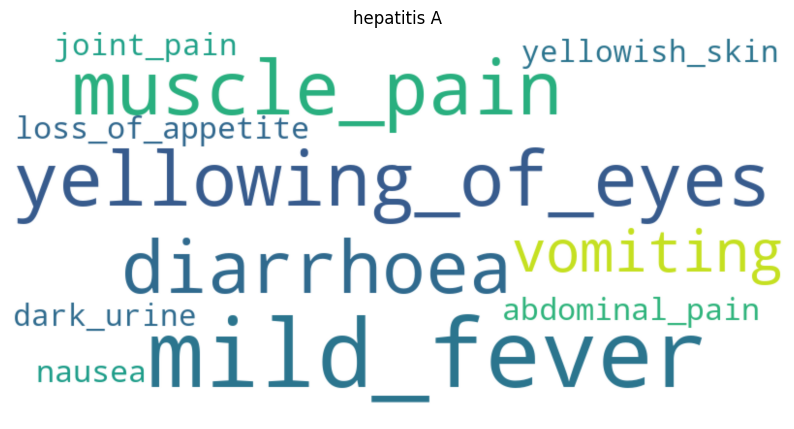

In [5]:
df_text = get_df_with_text(df_symptoms, X_COL, Y_COL)
img_path = 'visualizations/wordclouds/'

for i, (disease, symptoms) in enumerate(df_text.itertuples()):
    print('\n', '='*30, disease, '='*30, end='\n\n')
    wordcloud = get_wordcloud(symptoms)
    plot_wordcloud(wordcloud, disease)
    
    # Save the wordcloud
    processed_disease_name = disease.lower().strip().replace(' ', '_')
    save_wordcloud(wordcloud, path=img_path + processed_disease_name + '.png')

## **Train**

In [6]:
df_train = df_encoded.sample(frac=0.7, random_state=2)
df_test = df_encoded.drop(df_train.index)

In [7]:
dag = bn.structure_learning.fit(
    df_train,
    methodtype='cl',
    root_node=Y_COL
)

[bnlearn] >Computing best DAG using [chow-liu]


Building tree:   0%|          | 0/8646.0 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores for model comparison (higher is better).


In [8]:
model = bn.parameter_learning.fit(dag, df_train)
clear_output(wait=True)

# Save model to pkl file
save_model(model, 'models/bn_model')


15-04-25 14:23:59 [pypickle.pypickle] > INFO     > Pickle file saved: /Users/brunoramirezdelangel/Desktop/personal/bn-disease-prediction/models/bn_model.pkl


[pypickle]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


In [9]:
# Create a Pydantic model with the symptoms as fields
PredictionModel = create_pydantic_model(SYMPTOMS)

# Define the evidence
evidence = PredictionModel(
    blackheads=True,
    skin_rash=True,
    scurring=True
)

res = predict(model, evidence, Y_COL)
clear_output(wait=True)

# Display top 5 predictions
display(res.head())

Disease         p
2               Acne  0.844097
8        Chicken pox  0.015295
15  Fungal infection  0.015105
27          Impetigo  0.014897
35         Psoriasis  0.014897

## **Evaluate**

In [10]:
train_results = predict_df(df_train, model, PredictionModel, Y_COL)

clear_output(wait=True)

print('Train results')

print(f'Accuracy: {get_accuracy(train_results)*100:.2f}%')
print('\nSummary:')
display(get_summary(train_results))

Train results
Accuracy: 100.00%

Summary:


p                          
                                             mean       min       max count
real                                                                       
Hepatitis D                              0.986132  0.934295  0.995313    81
Fungal infection                         0.989898  0.959897  0.998736    76
Heart attack                             0.994505  0.973071  0.999221    70
Hepatitis E                              0.996512  0.950068  0.998956    85
hepatitis A                              0.997695  0.954889  0.999230    76
Hepatitis C                              0.998879  0.990882  0.999833    85
Chronic cholestasis                      0.998980  0.989254  0.999749    90
Cervical spondylosis                     0.999168  0.996040  0.999917    78
Paralysis (brain hemorrhage)             0.999487  0.996935  0.999936    83
Gastroenteritis                          0.999502  0.997909  0.999950    80
Drug Reaction                            0.999709  0.998983  0.999972    89
(vertigo) Paroymsal  Positional Vertigo  0.999854  0.999467  0.999988    85
Impetigo                                 0.999860  0.999281  0.999987    84
Bronchial Asthma                         0.999892  0.999646  0.999992    73
Acne                                     0.999902  0.999648  0.999991    91
Urinary tract infection                  0.999907  0.999576  0.999992    86
Hypertension                             0.999916  0.999643  0.999992    90
Jaundice                                 0.999920  0.999532  0.999991    80
Peptic ulcer diseae                      0.999921  0.999636  0.999992    80
Allergy                                  0.999936  0.999832  0.999996    85
AIDS                                     0.999962  0.999884  0.999997    90
GERD                                     0.999969  0.999901  0.999997    86
Malaria                                  0.999977  0.999842  0.999996    82
Osteoarthristis                          0.999981  0.999880  0.999998    86
Psoriasis                                0.999989  0.999953  0.999999    84
Arthritis                                0.999992  0.999955  0.999999    91
Typhoid                                  0.999994  0.999970  0.999999    85
Dimorphic hemmorhoids(piles)             0.999995  0.999975  1.000000    86
Alcoholic hepatitis                      0.999998  0.999993  1.000000    95
Hepatitis B                              0.999998  0.999987  1.000000    86
Pneumonia                                1.000000  0.999998  1.000000    81
Varicose veins                           1.000000  0.999999  1.000000    84
Common Cold                              1.000000  0.999999  1.000000    83
Tuberculosis                             1.000000  0.999999  1.000000    74
Migraine                                 1.000000  1.000000  1.000000    87
Hypothyroidism                           1.000000  1.000000  1.000000    85
Hypoglycemia                             1.000000  1.000000  1.000000    87
Hyperthyroidism                          1.000000  1.000000  1.000000    86
Dengue                                   1.000000  1.000000  1.000000    87
Chicken pox                              1.000000  1.000000  1.000000    82
Diabetes                                 1.000000  1.000000  1.000000    90

In [11]:
test_results = predict_df(df_test, model, PredictionModel, Y_COL)

clear_output(wait=True)

print('Test results')

print(f'Accuracy: {get_accuracy(test_results)*100:.2f}%')
print('\nSummary:')
display(get_summary(test_results))

Test results
Accuracy: 100.00%

Summary:


p                          
                                             mean       min       max count
real                                                                       
Hepatitis D                              0.984122  0.934295  0.995313    39
Heart attack                             0.991091  0.973071  0.999221    50
Fungal infection                         0.991103  0.959897  0.998736    44
hepatitis A                              0.994901  0.954889  0.999230    44
Hepatitis E                              0.996008  0.950068  0.998956    35
Cervical spondylosis                     0.999256  0.996040  0.999917    42
Chronic cholestasis                      0.999286  0.989254  0.999749    30
Hepatitis C                              0.999346  0.990882  0.999833    35
Paralysis (brain hemorrhage)             0.999443  0.996935  0.999936    37
Gastroenteritis                          0.999521  0.997909  0.999950    40
Drug Reaction                            0.999600  0.998983  0.999972    31
Impetigo                                 0.999835  0.999281  0.999987    36
Acne                                     0.999853  0.999648  0.999991    29
(vertigo) Paroymsal  Positional Vertigo  0.999898  0.999467  0.999988    35
Hypertension                             0.999906  0.999643  0.999992    30
Jaundice                                 0.999920  0.999532  0.999991    40
Peptic ulcer diseae                      0.999923  0.999636  0.999992    40
Urinary tract infection                  0.999923  0.999576  0.999992    34
Bronchial Asthma                         0.999923  0.999646  0.999992    47
Allergy                                  0.999940  0.999832  0.999996    35
Osteoarthristis                          0.999965  0.999880  0.999998    34
AIDS                                     0.999966  0.999884  0.999997    30
GERD                                     0.999972  0.999901  0.999997    34
Psoriasis                                0.999985  0.999953  0.999999    36
Malaria                                  0.999988  0.999958  0.999996    38
Arthritis                                0.999991  0.999955  0.999999    29
Dimorphic hemmorhoids(piles)             0.999993  0.999975  1.000000    34
Typhoid                                  0.999994  0.999970  0.999999    35
Hepatitis B                              0.999998  0.999987  1.000000    34
Alcoholic hepatitis                      0.999999  0.999993  1.000000    25
Varicose veins                           1.000000  0.999999  1.000000    36
Pneumonia                                1.000000  0.999999  1.000000    39
Common Cold                              1.000000  0.999999  1.000000    37
Tuberculosis                             1.000000  0.999999  1.000000    46
Chicken pox                              1.000000  1.000000  1.000000    38
Hypothyroidism                           1.000000  1.000000  1.000000    35
Hypoglycemia                             1.000000  1.000000  1.000000    33
Diabetes                                 1.000000  1.000000  1.000000    30
Dengue                                   1.000000  1.000000  1.000000    33
Migraine                                 1.000000  1.000000  1.000000    33
Hyperthyroidism                          1.000000  1.000000  1.000000    34